In [1]:
import imola
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = "retina"

np.random.seed(seed=777)

In [2]:
data = imola.load_yaml("example_config.yml")

l = imola.Lane(data)
em = imola.EgoMotion(data)
nc = imola.MeasurementNoiseCamera(data)
ni = imola.MeasurementNoiseImu(data)
c = imola.Camera(data)

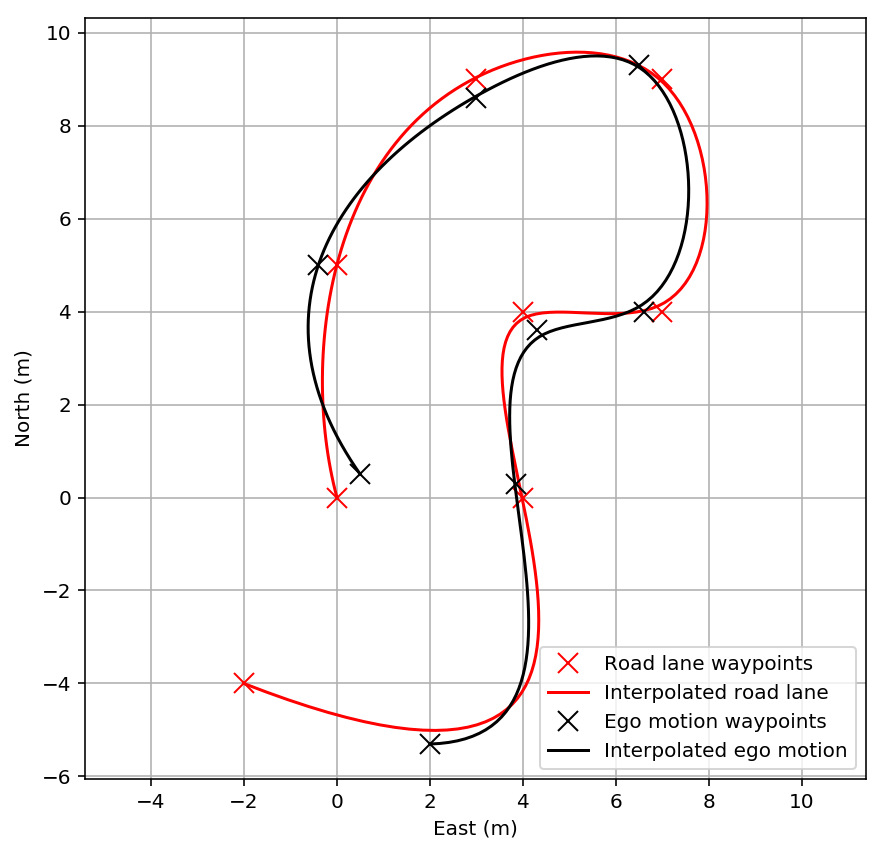

In [3]:
plt.figure(figsize=(7, 7))
plt.plot(l.xy_coarse[0, :], l.xy_coarse[1, :], "x", ms=10, c="r")
plt.plot(l.xy[0, :], l.xy[1, :], c="r")
plt.plot(em.xy_coarse[0, :], em.xy_coarse[1, :], "x", ms=10, c="k")
plt.plot(em.xy[0, :], em.xy[1, :], c="k")
plt.axis("equal")
plt.legend((
    "Road lane waypoints",
    "Interpolated road lane",
    "Ego motion waypoints",
    "Interpolated ego motion",
    ), loc="lower right")
plt.grid()
plt.xlabel("East (m)")
plt.ylabel("North (m)")
plt.show()

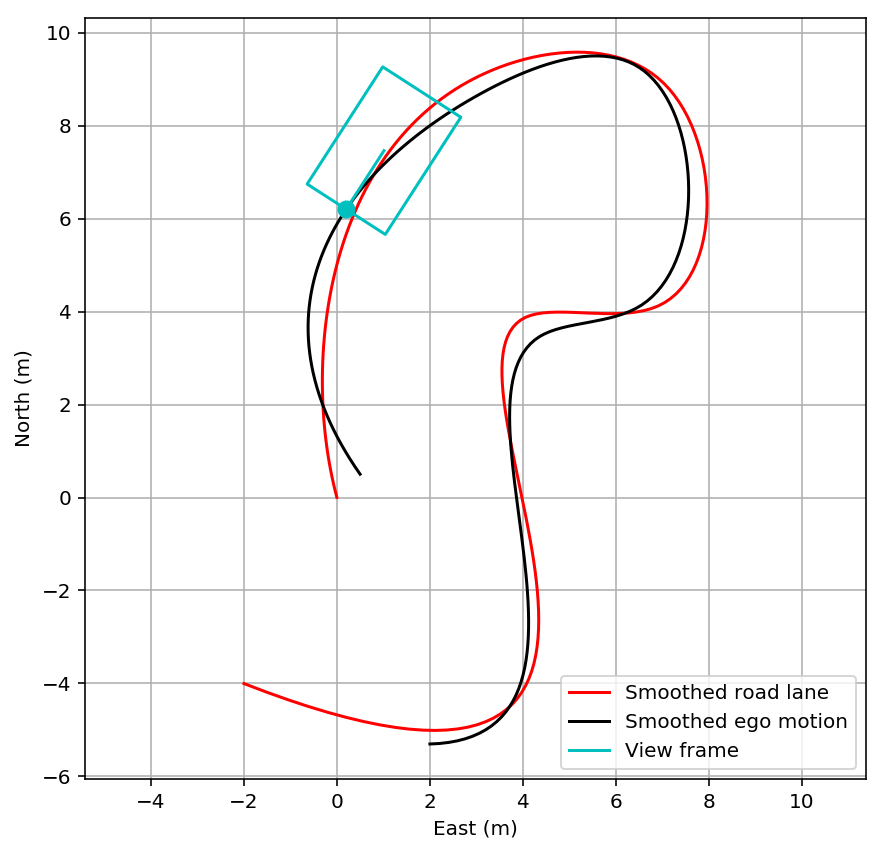

In [4]:
idx = 40

vf = imola.get_view_frame_inertial(
    c.frame_width,
    c.frame_height,
    em.xy[:, idx],
    [em.yaw[idx], em.yaw_deviation[idx]],
    )

plt.figure(figsize=(7, 7))
plt.plot(l.xy[0, :], l.xy[1, :], c="r")
plt.plot(em.xy[0, :], em.xy[1, :], c="k")
plt.plot(vf[0, :], vf[1, :], c="c")
plt.plot(em.xy[0, idx], em.xy[1, idx], "o", c="c", ms=8)
plt.axis("equal")
plt.legend((
        "Smoothed road lane", 
        "Smoothed ego motion",
        "View frame",
    ), loc="lower right")
plt.grid()
plt.xlabel("East (m)")
plt.ylabel("North (m)")
plt.show()

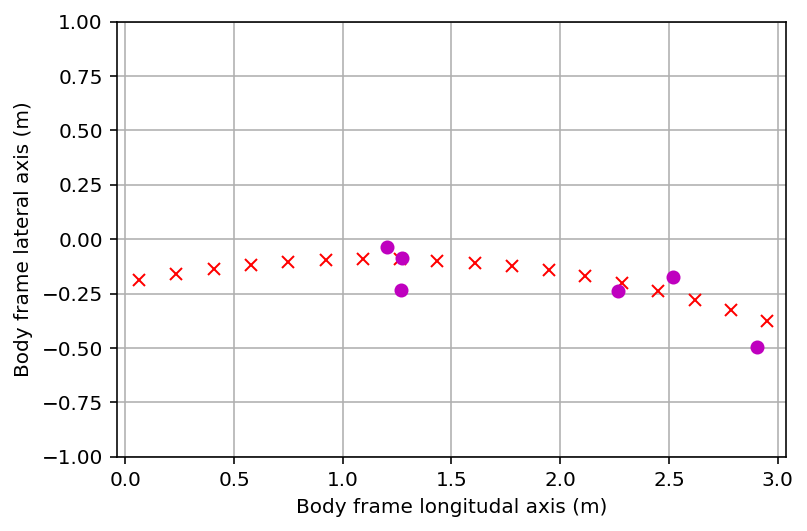

In [5]:
measurements, ground_truth = imola.get_measurements_camera(idx, l, em, nc, c)

plt.figure(figsize=(c.frame_height*2, c.frame_width*2))
plt.plot(ground_truth[0, :], ground_truth[1, :], "x", c="r")
plt.plot(measurements[0, :], measurements[1, :], "o", c="m")
plt.axis("equal")
plt.xlim([0.0, c.frame_height])
plt.ylim([-0.5*c.frame_width, 0.5*c.frame_width])
plt.grid()
plt.xlabel("Body frame longitudal axis (m)")
plt.ylabel("Body frame lateral axis (m)")
plt.show()